In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

file = 'C:/Users/Aaqib Aslam/Desktop/Notebooks/CSV Files/athlete_events.csv'
data = pd.read_csv(file)

sup_file = 'C:/Users/Aaqib Aslam/Desktop/Notebooks/CSV Files/noc_regions.csv'
sup_data = pd.read_csv(sup_file)

In [5]:
data.isna()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [7]:
data.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [15]:
dropped_data = data.dropna()
print(dropped_data.shape)

(30181, 15)


In [16]:
data.equals(dropped_data)

False

In [28]:
fixed_data = dropped_data
fixed_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


### Checked Data for a Country with the most number of Gold Medalist

In [44]:
gold = fixed_data[(fixed_data.Medal == "gold")]
group_by_country = gold.groupby('Team')
country_count = grouped_by_country['Name'].count()
print('Country with most gold medalists: \n', country_count.nlargest(1))

Country with most gold medalists: 
 Team
United States    4273
Name: Name, dtype: int64


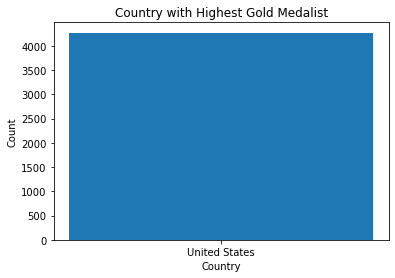

In [46]:
fig = plt.bar(x=country_count.nlargest(1).index, height=country_count.nlargest(1).values)
plt.title('Country with Highest Gold Medalist')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

### Do Female Atheletes win more Medals than their Male Counterparts?

In [70]:
sex_counts = fixed_data['Sex'].value_counts()
sex_counts

M    19831
F    10350
Name: Sex, dtype: int64

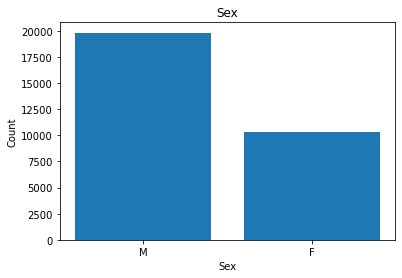

In [71]:
fig = plt.bar(x=sex_counts.index, height=sex_counts.values) 

plt.title('Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### How many of the Medals have been won by Pakistan? Summarize Pakistan's Medals by Medal Type

In [73]:
country_pakistan = fixed_data[(fixed_data.Team == "Pakistan")]
group_by_medal = country_pakistan.groupby('Medal')
medal_count = group_by_medal['Name'].count()
medal_count

Medal
Bronze    24
Gold      42
Silver    41
Name: Name, dtype: int64

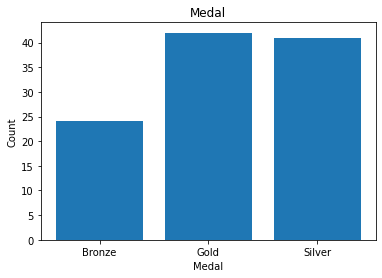

In [89]:
fig = plt.bar(x=medal_count.index, height=medal_count.values)

plt.title('Medal')
plt.xlabel('Medal')
plt.ylabel('Count')
plt.show()

### What is the average and median height for first 10 country?

In [88]:
grouped_by_country = fixed_data.groupby('Team')
mean_height = grouped_by_country['Height'].mean()
height=mean_height.head(10)
height

Team
Afghanistan                     183.000000
Algeria                         172.733333
Amateur Athletic Association    176.500000
Aphrodite                       182.000000
Argentina                       176.555556
Argonaut Rowing Club            185.000000
Armenia                         173.266667
Australasia                     178.000000
Australia                       178.882107
Australia-1                     182.500000
Name: Height, dtype: float64

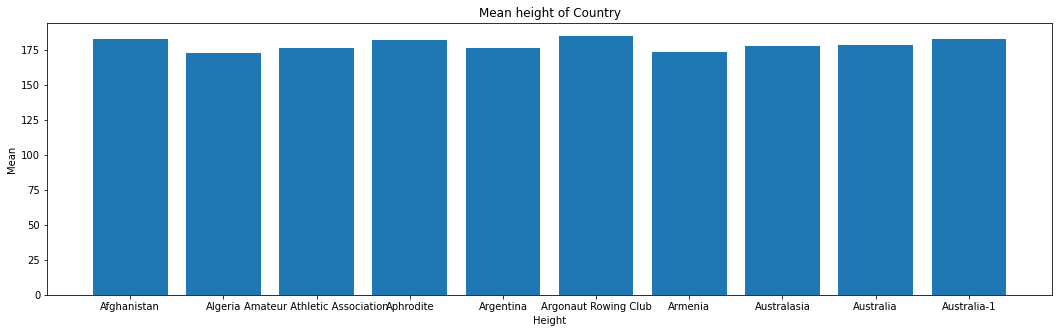

In [93]:
plt.rcParams['figure.figsize'] = [18, 5]
fig = plt.bar(x=height.index, height=height.values)

plt.title('Mean height of Country')
plt.xlabel('Height')
plt.ylabel('Mean')
plt.show()

### What is the maximum age and in  which country?

In [94]:
grouped_by_country = fixed_data.groupby('Team')
median_height = grouped_by_country['Height'].median()
median=median_height.head(10)
median

Team
Afghanistan                     183.0
Algeria                         170.0
Amateur Athletic Association    176.5
Aphrodite                       183.0
Argentina                       175.0
Argonaut Rowing Club            185.0
Armenia                         170.0
Australasia                     177.0
Australia                       179.0
Australia-1                     182.5
Name: Height, dtype: float64

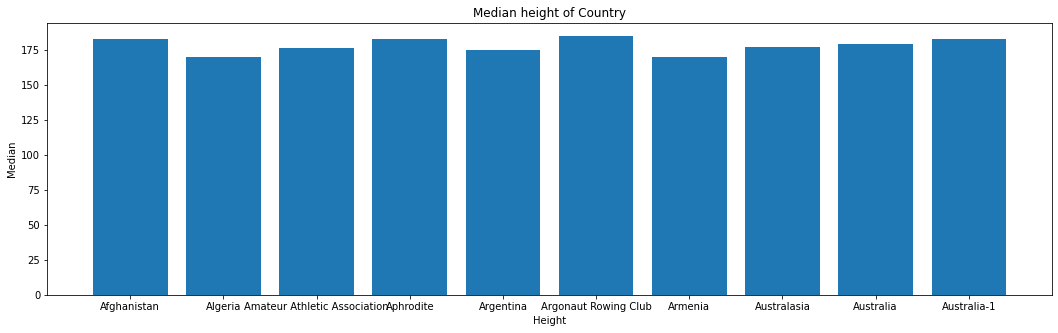

In [96]:
plt.rcParams['figure.figsize'] = [18, 5]
fig = plt.bar(x=median.index, height=median.values)

plt.title('Median height of Country')
plt.xlabel('Height')
plt.ylabel('Median')
plt.show()

### What was most played sports and which ten countries did good in that sports?

In [116]:
column = fixed_data["Age"]
max_value = column.max()
max_index = column.idxmax()
max_age = fixed_data["Team"][max_index]
print("The country with maximum age",max_age,"and the age is",max_value,".")

The country with maximum age Switzerland and the age is 66.0 .


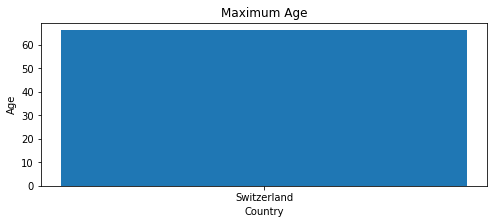

In [120]:
plt.rcParams['figure.figsize'] = [8, 3]
fig = plt.bar(x=max_age, height=max_value)

plt.title('Maximum Age')
plt.xlabel('Country')
plt.ylabel('Age')
plt.show()

In [129]:
max_sport = fixed_data["Sport"].max()
country_sports = fixed_data[(fixed_data.Sport == max_sport)]
group_by_country = country_sports.groupby('Team')
sports_count = group_by_country['Name'].count()
print(max_sport)
sports=sports_count.head(10)
print(sports)

Wrestling
Team
Armenia        8
Australia      1
Azerbaijan    23
Belarus       11
Belgium        1
Bulgaria      65
Canada        12
China         10
Colombia       2
Cuba          21
Name: Name, dtype: int64


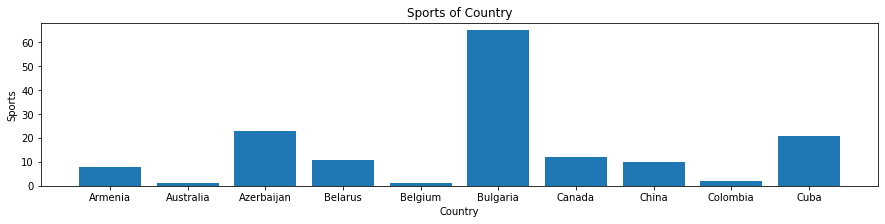

In [132]:
plt.rcParams['figure.figsize'] = [15, 3]
fig = plt.bar(x=sports.index, height=sports.values)

plt.title('Sports of Country')
plt.xlabel('Country')
plt.ylabel('Sports')
plt.show()

In [2]:
import pandas as pd
file = 'C:/Users/XD/Desktop/KarachiAI Course/CSV Files/athlete_events.csv'
data = pd.read_csv(file)

sup_file = 'C:/Users/XD/Desktop/KarachiAI Course/CSV Files/noc_regions.csv'
sup_data = pd.read_csv(sup_file)

In [5]:
data.set_index('NOC').join(sup_data.set_index('NOC'))

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,region,notes
NOC,,,,,,,,,,,,,,,,
AFG,502,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
AFG,1076,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
AFG,1101,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,1948 Summer,1948,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN
AFG,1745,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN
AFG,4628,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZIM,130832,Hillary Wilson,F,15.0,157.0,65.0,Zimbabwe,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 100 metres Butterfly,NaN,Zimbabwe,NaN
ZIM,130832,Hillary Wilson,F,15.0,157.0,65.0,Zimbabwe,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Medley Relay,NaN,Zimbabwe,NaN
ZIM,130880,Peter Arthur Wilson,M,20.0,185.0,80.0,Zimbabwe,1980 Summer,1980,Summer,Moskva,Sailing,Sailing Mixed One Person Dinghy,NaN,Zimbabwe,NaN
